In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score


In [2]:
plt.rcParams["figure.figsize"] = (18,10)

In [3]:
data = pd.read_csv("multishapes.csv", index_col='Unnamed: 0')

data.head()

,x,y,shape
1,-0.803739,-0.853053,1
2,0.852851,0.367618,1
3,0.927180,-0.274902,1
4,-0.752626,-0.511565,1
5,0.706846,0.810679,1


In [62]:
sil_score = []

epsilons = np.linspace(0.1, .5, 20)

for epsilon in epsilons:
    db=DBSCAN(eps=epsilon, min_samples=3)
    sil_score.append(silhouette_score(data, db.fit_predict(data)))
best_eps=epsilons[np.argmax(sil_score)]



best_db = DBSCAN(eps=best_eps, min_samples=3).fit(data)
data['predicted_labels']=best_db.fit_predict(data)

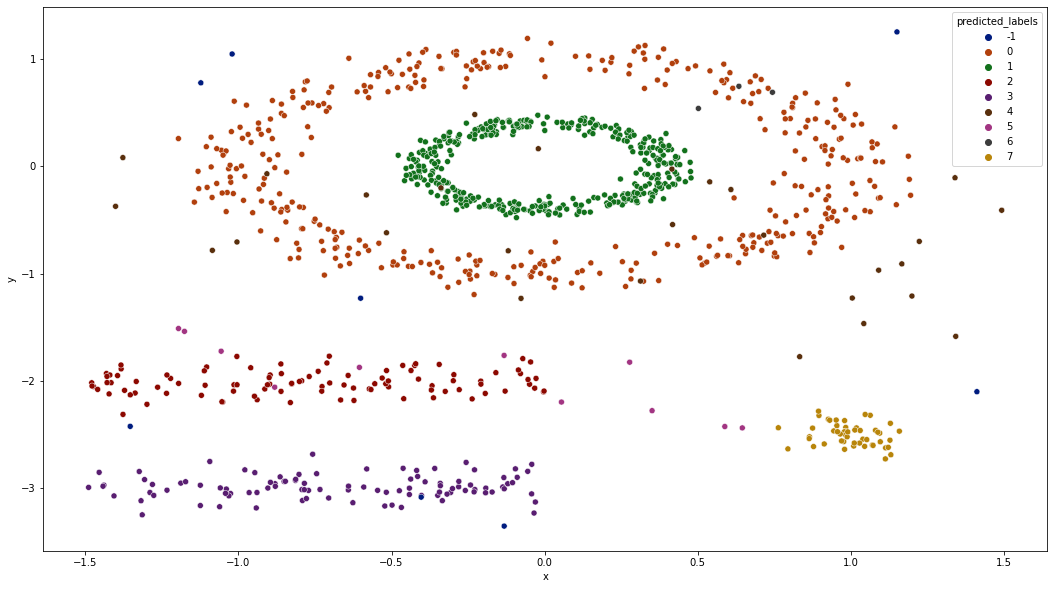

In [63]:
sns.scatterplot(data = data,x="x", y="y", hue="predicted_labels",palette= 'dark'); 
                #,palette=['green','orange','brown','dodgerblue','red',"black","purple","yellow"]);

### EJERCICIO PARA HACER EN CLASE

- Utilizar el dataset "banknote.csv" 
- Algunas notas de cambio son falsas con lo cual pueden diferir un poco de las verdaderas. 
- Lucas mezclo los subindices y perdio las etiquetas antes de empezar la clase. 
- Utilizar dbscan para encontrarlas.

In [76]:
from sklearn.preprocessing import StandardScaler

banknote=pd.read_csv("banknote.csv", sep = " ")

banknote.head()

banknote_scaled = StandardScaler().fit_transform(banknote)

In [117]:
sil_score = []

epsilons = np.linspace(1, 2, 10)

for epsilon in epsilons:
    db=DBSCAN(eps=epsilon, min_samples=3)
    sil_score.append(silhouette_score(banknote_scaled, db.fit_predict(banknote_scaled)))
best_eps=epsilons[np.argmax(sil_score)]

db.fit_predict(banknote_scaled)

best_db = DBSCAN(eps=best_eps, min_samples=3).fit(banknote_scaled)
banknote['db_labels']=best_db.fit_predict(banknote_scaled)

In [118]:
banknote.db_labels.value_counts()

 0    96
-1     7
 1     7
Name: db_labels, dtype: int64

### NOTAS DE CAMBIO FALSAS SEGUN DBSCAN

In [119]:
banknote[banknote.db_labels==-1]

,Length,Left,Right,Bottom,Top,Diagonal,db_labels
0,214.8,131.0,131.1,9.0,9.7,141.0,-1
4,215.0,129.6,129.7,10.4,7.7,141.8,-1
39,213.9,130.3,129.0,8.1,9.7,141.3,-1
69,214.9,130.2,130.2,8.0,11.2,139.6,-1
104,214.6,130.5,130.4,10.1,11.4,139.3,-1
106,214.6,129.7,129.3,10.4,11.0,139.3,-1
109,214.9,129.9,130.0,9.9,12.3,139.4,-1
